In [234]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  # visualization
import seaborn as sns # visualization
%matplotlib inline
%whos

Variable                Type                        Data/Info
-------------------------------------------------------------
CO2_col                 DataFrame                           Country   YEA Pow<...>\n[2674 rows x 6 columns]
GDP_CO2                 DataFrame                         COU    Country     <...>n[2674 rows x 15 columns]
GDP_CO2_df              DataFrame                          COU    Country    <...>[10304 rows x 15 columns]
GDPandCO2               DataFrame                          Country   YEA     <...>\n[886 rows x 10 columns]
LinearRegression        ABCMeta                     <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
LogisticRegression      type                        <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
StandardScaler          type                        <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X                       DataFrame                         GDP_STD  CO2 GDP_ST<...>n\n[552 rows x 3 columns]
X2          

In [235]:
GDP_CO2_df = pd.read_csv("GDP_CO2.csv")
multifactor_PG_df = pd.read_csv("multifactor_PG.csv")
waste_df = pd.read_csv("MUNW_05122019094729934.csv")
productGDP_df = pd.read_csv("gross_domestic_product.csv")


# Gross domestic product (GDP)

## Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports). While GDP is the single most important indicator to capture economic activity, it falls short of providing a suitable measure of people's material well-being for which alternative indicators may be more appropriate. This indicator is based on nominal GDP (also called GDP at current prices or GDP in value) and is available in different measures: US dollars and US dollars per capita (current PPPs). All OECD countries compile their data according to the 2008 System of National Accounts (SNA). This indicator is less suited for comparisons over time, as developments are not only caused by real growth, but also by changes in prices and PPPs.

## all the groups in the features

In [236]:
GDP_CO2 =GDP_CO2_df.loc[(GDP_CO2_df.VAR == 'CO2_PBPROD')]

In [237]:
groups_countries = GDP_CO2.groupby("Country")
i=1

for group_name, group_df in groups_countries:
    print(str(i) + " " + group_name)
    i=i+1

1 Albania
2 Algeria
3 Angola
4 Argentina
5 Armenia
6 Australia
7 Austria
8 Azerbaijan
9 BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa
10 Bahrain
11 Bangladesh
12 Belarus
13 Belgium
14 Benin
15 Bolivia
16 Bosnia and Herzegovina
17 Botswana
18 Brazil
19 Brunei Darussalam
20 Bulgaria
21 Cambodia
22 Cameroon
23 Canada
24 Chile
25 China (People's Republic of)
26 Colombia
27 Congo
28 Costa Rica
29 Croatia
30 Cuba
31 Cyprus
32 Czech Republic
33 Côte d'Ivoire
34 Democratic Republic of the Congo
35 Denmark
36 Dominican Republic
37 Eastern Europe, Caucasus and Central Asia
38 Ecuador
39 Egypt
40 El Salvador
41 Eritrea
42 Estonia
43 Ethiopia
44 Euro area (19 countries)
45 European Union (28 countries)
46 Finland
47 France
48 G20
49 G7
50 Georgia
51 Germany
52 Ghana
53 Greece
54 Guatemala
55 Haiti
56 Honduras
57 Hungary
58 Iceland
59 India
60 Indonesia
61 Iran
62 Iraq
63 Ireland
64 Israel
65 Italy
66 Jamaica
67 Japan
68 Jordan
69 Kazakhstan
70 Kenya
71 Korea
72 Kuwait

# Creating test data frame from product GDP ,GDP_CO2 & Waste

In [238]:
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'G7'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD - Total'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'G20'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD - Europe'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD America'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
productGDP_df.drop(productGDP_df.loc[productGDP_df['Country'] == 'World'].index , inplace = True)
productGDP=productGDP_df.loc[(productGDP_df['SUBJECT'] == 'T_GDP')&(productGDP_df.Unit == 'US Dollar')& (productGDP_df.MEASURE =='VPVOB')]
productGDP.shape

(1813, 17)

In [239]:
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'G7'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'G20'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD - Europe'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD - Total'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD America'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
GDP_CO2_df.drop(GDP_CO2_df.loc[GDP_CO2_df['Country'] == 'World'].index , inplace = True)
GDP_CO2 =GDP_CO2_df.loc[(GDP_CO2_df.VAR == 'CO2_PBPROD')]
GDP_CO2.shape

(2674, 15)

In [240]:
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'G7'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'G20'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Euro area (19 countries)'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'European Union (28 countries)'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD - Europe'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD - Total'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD America'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'OECD Asia Oceania'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Eastern Europe, Caucasus and Central Asia'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'World'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'ASEAN'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Latin America and Caribbean'].index , inplace = True)
multifactor_PG_df.drop(multifactor_PG_df.loc[multifactor_PG_df['Country'] == 'Middle East and North Africa'].index , inplace = True)
multifactor = multifactor_PG_df.loc[multifactor_PG_df['VAR'] == 'EAMFP_EAMFPG']
multifactor.shape

(744, 15)

In [241]:
CO2_col = GDP_CO2[['Country','YEA','PowerCode','Unit','Value','Variable',]]
productGDP_col = productGDP[['Country','TIME','Unit','Value','PowerCode','Subject']]
multifactor_col = multifactor[['Country','YEA','Unit','Value','PowerCode','Variable']]

In [242]:
waste_col = waste_df[['Country','YEA','PowerCode','Unit','Value','Variable',]]
waste_col = waste_col.loc[waste_col['Variable'] == 'Municipal waste generated']
waste_col

,Country,YEA,PowerCode,Unit,Value,Variable
0,Australia,1992,Thousands,Tonnes,12000.000,Municipal waste generated
1,Australia,2000,Thousands,Tonnes,13200.000,Municipal waste generated
2,Australia,2007,Thousands,Tonnes,12798.666,Municipal waste generated
3,Australia,2008,Thousands,Tonnes,13027.542,Municipal waste generated
4,Australia,2009,Thousands,Tonnes,13256.419,Municipal waste generated
...,...,...,...,...,...,...
17530,OECD America,2013,Thousands,Tonnes,304164.031,Municipal waste generated
17531,OECD America,2014,Thousands,Tonnes,307671.938,Municipal waste generated
17532,OECD America,2015,Thousands,Tonnes,307882.906,Municipal waste generated
17533,OECD America,2016,Thousands,Tonnes,307925.281,Municipal waste generated


# Municipal waste

## Municipal waste is defined as waste collected and treated by or for municipalities. It covers waste from households, including bulky waste, similar waste from commerce and trade, office buildings, institutions and small businesses, as well as yard and garden waste, street sweepings, the contents of litter containers, and market cleansing waste if managed as household waste. The definition excludes waste from municipal sewage networks and treatment, as well as waste from construction and demolition activities. This indicator is measured in thousand tonnes and in kilograms per capit

In [243]:
productGDP_col.rename(columns ={'TIME' : 'YEA'}, inplace=True )
GDPandCO2 = pd.merge(productGDP_col, CO2_col, on=['Country','YEA'], how='inner')
test = pd.merge(GDPandCO2, multifactor_col, on=['Country','YEA'], how='inner')
test.rename(columns ={'Value_x' : 'GDP'}, inplace=True )
test.rename(columns ={'Value_y' : 'CO2 GDP'}, inplace=True )
test.rename(columns ={'Value' : 'multifactor'}, inplace=True )
test

C:\Users\boork\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country,YEA,Unit_x,GDP,PowerCode_x,Subject,PowerCode_y,Unit_y,CO2 GDP,Variable_x,Unit,multifactor,PowerCode,Variable_y
0,Australia,1995,US Dollar,574401.6402,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.013156,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.040453,Units,Environmentally adjusted multifactor productiv...
1,Australia,2000,US Dollar,695179.4993,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.077365,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.962618,Units,Environmentally adjusted multifactor productiv...
2,Australia,2001,US Dollar,722996.6281,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.120337,"Production-based CO2 productivity, GDP per uni...",Percentage points,3.157764,Units,Environmentally adjusted multifactor productiv...
3,Australia,2002,US Dollar,744585.0171,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.133708,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.390201,Units,Environmentally adjusted multifactor productiv...
4,Australia,2003,US Dollar,774781.6857,Millions,Gross Domestic Product (GDP); millions,Units,Number,2.226577,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.696690,Units,Environmentally adjusted multifactor productiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Lithuania,2009,US Dollar,61222.6963,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,Units,Environmentally adjusted multifactor productiv...
623,Lithuania,2010,US Dollar,62226.6379,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,Units,Environmentally adjusted multifactor productiv...
624,Lithuania,2011,US Dollar,65987.0750,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,Units,Environmentally adjusted multifactor productiv...
625,Lithuania,2012,US Dollar,68512.3701,Millions,Gross Domestic Product (GDP); millions,Units,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,Units,Environmentally adjusted multifactor productiv...


In [244]:
test = pd.merge(test, waste_col, on=['Country','YEA'], how='inner')

In [245]:
test.drop(['PowerCode_x','PowerCode_y',], axis=1,inplace = True) #not needed columns.
test

,Country,YEA,Unit_x,GDP,Subject,Unit_y,CO2 GDP,Variable_x,Unit_x,multifactor,Variable_y,Unit_y,Value,Variable
0,Australia,2000,US Dollar,695179.4993,Gross Domestic Product (GDP); millions,Number,2.077365,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.962618,Environmentally adjusted multifactor productiv...,Tonnes,13200.000,Municipal waste generated
1,Australia,2007,US Dollar,884773.2212,Gross Domestic Product (GDP); millions,Number,2.321826,"Production-based CO2 productivity, GDP per uni...",Percentage points,1.322013,Environmentally adjusted multifactor productiv...,Tonnes,12798.666,Municipal waste generated
2,Australia,2008,US Dollar,901910.4415,Gross Domestic Product (GDP); millions,Number,2.346825,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.297271,Environmentally adjusted multifactor productiv...,Tonnes,13027.542,Municipal waste generated
3,Australia,2009,US Dollar,920557.6210,Gross Domestic Product (GDP); millions,Number,2.353874,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.989869,Environmentally adjusted multifactor productiv...,Tonnes,13256.419,Municipal waste generated
4,Australia,2010,US Dollar,943228.4205,Gross Domestic Product (GDP); millions,Number,2.458764,"Production-based CO2 productivity, GDP per uni...",Percentage points,0.341918,Environmentally adjusted multifactor productiv...,Tonnes,13515.592,Municipal waste generated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Lithuania,2009,US Dollar,61222.6963,Gross Domestic Product (GDP); millions,Number,5.367111,"Production-based CO2 productivity, GDP per uni...",Percentage points,-9.279573,Environmentally adjusted multifactor productiv...,Tonnes,1205.530,Municipal waste generated
548,Lithuania,2010,US Dollar,62226.6379,Gross Domestic Product (GDP); millions,Number,5.052909,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.739208,Environmentally adjusted multifactor productiv...,Tonnes,1252.620,Municipal waste generated
549,Lithuania,2011,US Dollar,65987.0750,Gross Domestic Product (GDP); millions,Number,5.725554,"Production-based CO2 productivity, GDP per uni...",Percentage points,6.462632,Environmentally adjusted multifactor productiv...,Tonnes,1339.280,Municipal waste generated
550,Lithuania,2012,US Dollar,68512.3701,Gross Domestic Product (GDP); millions,Number,5.941576,"Production-based CO2 productivity, GDP per uni...",Percentage points,2.493612,Environmentally adjusted multifactor productiv...,Tonnes,1330.160,Municipal waste generated


In [246]:
df = test[['GDP','CO2 GDP','multifactor','Value']]
df

,GDP,CO2 GDP,multifactor,Value
0,695179.4993,2.077365,0.962618,13200.000
1,884773.2212,2.321826,1.322013,12798.666
2,901910.4415,2.346825,0.297271,13027.542
3,920557.6210,2.353874,0.989869,13256.419
4,943228.4205,2.458764,0.341918,13515.592
...,...,...,...,...
547,61222.6963,5.367111,-9.279573,1205.530
548,62226.6379,5.052909,6.739208,1252.620
549,65987.0750,5.725554,6.462632,1339.280
550,68512.3701,5.941576,2.493612,1330.160


In [247]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [248]:
def standardNormalization(data):
    standardized = (data-data.mean())/data.std()
    return pd.Series(standardized)

## We can see that there is a high correlation between the GDP and the Municipal waste generated


In [249]:
x = df.GDP
z = df['CO2 GDP']
u = df.multifactor
y = test.Value
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
y = standardNormalization(y)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'waste':y}
df = pd.DataFrame(data=d)
df

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
0,-0.269427,-1.251761,-0.212049,-0.231198
1,-0.199186,-1.117895,-0.064355,-0.240477
2,-0.192837,-1.104205,-0.485476,-0.235186
3,-0.185928,-1.100345,-0.200850,-0.229894
4,-0.177529,-1.042908,-0.467128,-0.223902
...,...,...,...,...
547,-0.504295,0.549691,-4.421107,-0.508515
548,-0.503923,0.377635,2.161857,-0.507427
549,-0.502530,0.745973,2.048197,-0.505423
550,-0.501594,0.864266,0.417117,-0.505634


In [250]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
GDP_STD,1.0,-0.24,-0.009,0.97
CO2 GDP_STD,-0.24,1.0,-0.11,-0.27
multifactor_STD,-0.009,-0.11,1.0,-0.0036
waste,0.97,-0.27,-0.0036,1.0


In [251]:
X = df[['GDP_STD','CO2 GDP_STD','multifactor_STD']]
y = df.waste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [252]:
diabetes = datasets.load_diabetes()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2()
p_values

C:\Users\boork\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.947   
Dependent Variable: waste            AIC:                -50.2318
Date:               2020-01-28 21:19 BIC:                -32.9776
No. Observations:   552              Log-Likelihood:     29.116  
Df Model:           3                F-statistic:        3278.   
Df Residuals:       548              Prob (F-statistic): 0.00    
R-squared:          0.947            Scale:              0.053072
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0000   0.0098 -0.0000 1.0000 -0.0193  0.0193
GDP_STD            0.9647   0.0101 95.2337 0.0000  0.9448  0.9846
CO2 GDP_STD       -0.0330   0.0102 -3.2340 0.0013 -0.0530 -0.0129
multifactor_STD    0.0015   0.0099  0.1510 0.8800 -0.0179  0.0209
-----------------------------------------------------------------
Omnibus:             189.731      Durbin-Watson:         0.311   
Prob(Omnibus):       0.000        Jarque-Bera (JB):      3334.926
Skew:                1.028        Prob(JB):              0.000   
Kurtosis:            14.865       Condition No.:         1       
=================================================================

"""

Text(0.5, 0.98, 'GDP vs waste generated ')

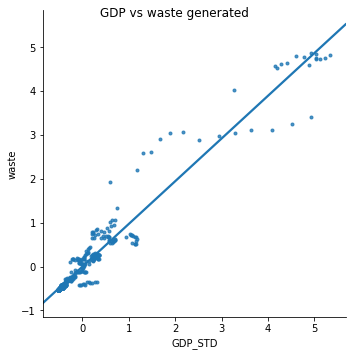

In [253]:
sns.lmplot(x='GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs waste generated ')

Text(0.5, 0.98, 'CO2 GDP vs waste generated ')

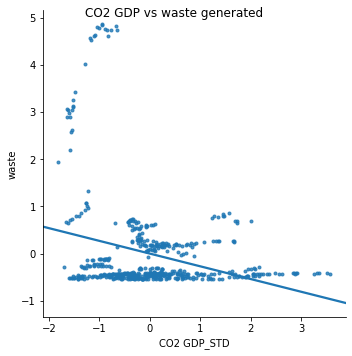

In [254]:
sns.lmplot(x='CO2 GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('CO2 GDP vs waste generated ')


Text(0.5, 0.98, 'multifactor vs waste generated ')

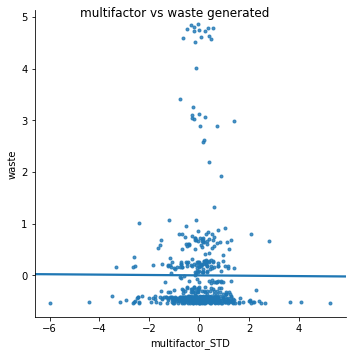

In [255]:
sns.lmplot(x='multifactor_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('multifactor vs waste generated ')

In [256]:
df.waste.describe()

count    5.520000e+02
mean    -3.620292e-18
std      1.000000e+00
min     -5.337521e-01
25%     -4.727894e-01
50%     -4.213837e-01
75%      1.673316e-01
max      4.856151e+00
Name: waste, dtype: float64

# we split the data into 2 groups, one where the value is over 30000, and the othe with less. we are doiing it to try to avoid compering countries with different size of population.

In [257]:
group_1 = test.loc[test.Value>30000]
df = group_1[['GDP','CO2 GDP','multifactor','Value']]


In [258]:
x = df.GDP
z = df['CO2 GDP']
u = df.multifactor
y= df.Value
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
y= standardNormalization(y)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'waste':y}
df = pd.DataFrame(data=d)
df

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
81,-0.548713,0.964001,0.966143,-0.662084
82,-0.538636,0.997436,-0.038239,-0.646515
83,-0.532754,1.088758,0.425382,-0.638682
84,-0.528441,1.062777,-0.228285,-0.659377
85,-0.513494,1.152012,0.255202,-0.642550
...,...,...,...,...
496,-0.250234,-1.121173,-0.524313,-0.124189
497,-0.313304,-1.128365,-2.751182,-0.087658
498,-0.279825,-1.147416,-1.334665,-0.049218
499,-0.246699,-1.155200,-0.068661,-0.050159


In [259]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
GDP_STD,1.0,-0.49,0.05,0.96
CO2 GDP_STD,-0.49,1.0,-0.18,-0.54
multifactor_STD,0.05,-0.18,1.0,0.085
waste,0.96,-0.54,0.085,1.0


In [260]:
X = df[['GDP_STD','CO2 GDP_STD','multifactor_STD']]
y = df.waste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [261]:
diabetes = datasets.load_diabetes()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2()
p_values

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.928   
Dependent Variable: waste            AIC:                33.4849 
Date:               2020-01-28 21:19 BIC:                45.3363 
No. Observations:   143              Log-Likelihood:     -12.742 
Df Model:           3                F-statistic:        611.2   
Df Residuals:       139              Prob (F-statistic): 7.84e-80
R-squared:          0.930            Scale:              0.071986
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0000   0.0224 -0.0000 1.0000 -0.0444  0.0444
GDP_STD            0.9106   0.0258 35.3255 0.0000  0.8596  0.9615
CO2 GDP_STD       -0.0987   0.0262 -3.7744 0.0002 -0.1504 -0.0470
multifactor_STD    0.0226   0.0229  0.9869 0.3254 -0.0227  0.0679
-----------------------------------------------------------------
Omnibus:               7.353       Durbin-Watson:          0.280 
Prob(Omnibus):         0.025       Jarque-Bera (JB):       11.395
Skew:                  0.203       Prob(JB):               0.003 
Kurtosis:              4.322       Condition No.:          2     
=================================================================

"""

Text(0.5, 0.98, 'GDP vs waste generated ')

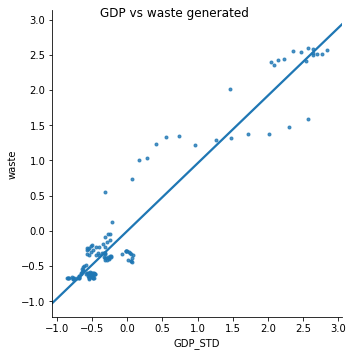

In [262]:
sns.lmplot(x='GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs waste generated ')

Text(0.5, 0.98, 'CO2 GDP vs waste generated ')

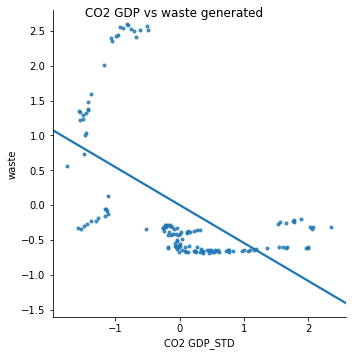

In [263]:
sns.lmplot(x='CO2 GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('CO2 GDP vs waste generated ')


Text(0.5, 0.98, 'multifactor vs waste generated ')

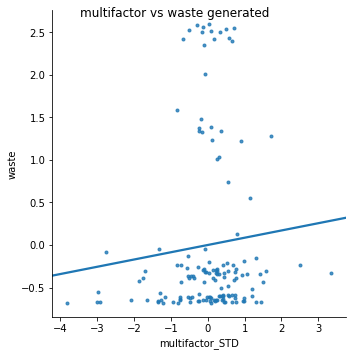

In [264]:
sns.lmplot(x='multifactor_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('multifactor vs waste generated ')

##  All the outliers are all from the U.S.A and China 

In [265]:
regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
regr.fit(X_train, y_train)
y_train_predicted = regr.predict(X_train)

In [266]:

y_pred = regr.predict(X_test) #group num 1
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.89655341 -0.1115699   0.0048837 ]
Mean squared error: 0.08
Coefficient of determination: 0.94


In [267]:
print ("R-squared:" ,regr.score(X, y)) #group num 1

R-squared: 0.9290210769172075


In [268]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 0.06739638968090107
RMSE: 0.25960814640704377
MAE: 0.1764114394530633


In [269]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))

------ TEST DATA ------
MSE: 0.07765972348061456
RMSE: 0.278674942326386
MAE: 0.20041384973805598


In [270]:
fitted_Waste = regr.predict(X) # returns ndarray
df['FittedWaste']=pd.Series(fitted_Waste)
res=df['waste']-df['FittedWaste']
df['Res']=pd.Series(res)


## group >30000 results

In [271]:
df.head(5)

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste,FittedWaste,Res
81,-0.548713,0.964001,0.966143,-0.662084,-0.474923,-0.187162
82,-0.538636,0.997436,-0.038239,-0.646515,-0.467545,-0.178970
83,-0.532754,1.088758,0.425382,-0.638682,-0.468785,-0.169896
84,-0.528441,1.062777,-0.228285,-0.659377,-0.481772,-0.177604
85,-0.513494,1.152012,0.255202,-0.642550,-0.526320,-0.116230


## second group <30000

In [272]:
group_2 = test.loc[test.Value<30000]
df = group_2[['GDP','CO2 GDP','multifactor','Value']]


In [273]:
x = df.GDP
z = df['CO2 GDP']
u = df.multifactor
y  = df.Value
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
y = standardNormalization(y)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'waste':y}
df = pd.DataFrame(data=d)
df

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
0,0.583568,-1.298687,-0.227766,1.060268
1,0.986221,-1.166861,-0.086472,1.000928
2,1.022617,-1.153380,-0.489344,1.034769
3,1.062219,-1.149579,-0.217052,1.068610
4,1.110367,-1.093017,-0.471791,1.106930
...,...,...,...,...
547,-0.762811,0.475309,-4.254432,-0.713186
548,-0.760679,0.305875,2.043272,-0.706224
549,-0.752693,0.668599,1.934537,-0.693410
550,-0.747330,0.785089,0.374137,-0.694759


In [274]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
GDP_STD,1.0,0.013,0.016,0.84
CO2 GDP_STD,0.013,1.0,-0.1,-0.047
multifactor_STD,0.016,-0.1,1.0,-0.0082
waste,0.84,-0.047,-0.0082,1.0


In [275]:
X = df[['GDP_STD','CO2 GDP_STD','multifactor_STD']]
y = df.waste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [276]:
diabetes = datasets.load_diabetes()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2()
p_values

C:\Users\boork\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.714    
Dependent Variable: waste            AIC:                653.1464 
Date:               2020-01-28 21:19 BIC:                669.2013 
No. Observations:   409              Log-Likelihood:     -322.57  
Df Model:           3                F-statistic:        340.0    
Df Residuals:       405              Prob (F-statistic): 3.13e-110
R-squared:          0.716            Scale:              0.28631  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0000   0.0265  0.0000 1.0000 -0.0520  0.0520
GDP_STD             0.8449   0.0265 31.8855 0.0000  0.7928  0.8969
CO2 GDP_STD        -0.0602   0.0266 -2.2599 0.0244 -0.1125 -0.0078
multifactor_STD    -0.0276   0.0266 -1.0376 0.3001 -0.0800  0.0247
------------------------------------------------------------------
Omnibus:              139.408      Durbin-Watson:         0.253   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      2570.597
Skew:                 -0.943       Prob(JB):              0.000   
Kurtosis:             15.136       Condition No.:         1       
==================================================================

"""

Text(0.5, 0.98, 'GDP vs waste generated ')

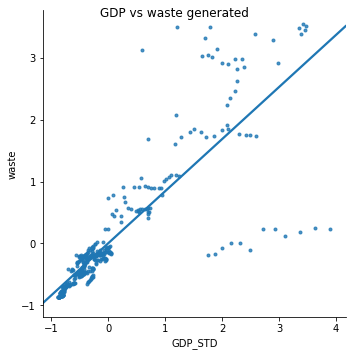

In [277]:
sns.lmplot(x='GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('GDP vs waste generated ')

Text(0.5, 0.98, 'CO2 GDP vs waste generated ')

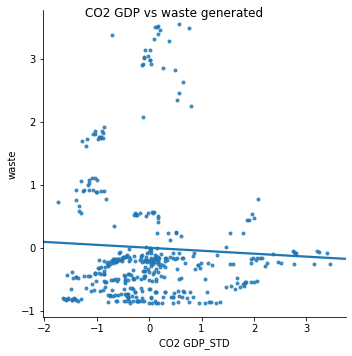

In [278]:
sns.lmplot(x='CO2 GDP_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('CO2 GDP vs waste generated ')


Text(0.5, 0.98, 'multifactor vs waste generated ')

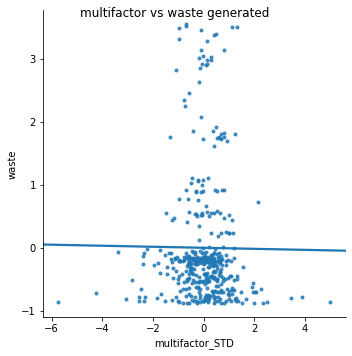

In [279]:
sns.lmplot(x='multifactor_STD',y='waste', ci= None, data=df, markers='.')
plt.gcf().suptitle('multifactor vs waste generated ')

In [280]:
regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
regr.fit(X_train, y_train)
y_train_predicted = regr.predict(X_train)

In [281]:
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.93153685 -0.04318631  0.0015183 ]
Mean squared error: 0.40
Coefficient of determination: 0.57


In [282]:
print ("R-squared:" ,regr.score(X, y))

R-squared: 0.7064890808336755


In [283]:
from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 0.24604058563270628
RMSE: 0.4960247832847733
MAE: 0.22982963838149548


In [284]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))

------ TEST DATA ------
MSE: 0.4015028254382624
RMSE: 0.6336425060223331
MAE: 0.2771421912691041


In [285]:
fitted_Waste = regr.predict(X) # returns ndarray
df['FittedWaste']=pd.Series(fitted_Waste)
res=df['waste']-df['FittedWaste']
df['Res']=pd.Series(res)

## group <30000 results

In [286]:
df.head(5)

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste,FittedWaste,Res
0,0.583568,-1.298687,-0.227766,1.060268,0.624499,0.435769
1,0.986221,-1.166861,-0.086472,1.000928,0.994107,0.006821
2,1.022617,-1.153380,-0.489344,1.034769,1.026817,0.007952
3,1.062219,-1.149579,-0.217052,1.068610,1.063957,0.004653
4,1.110367,-1.093017,-0.471791,1.106930,1.105979,0.000951


## Classification

In [287]:
df_class = test[['Value']]

In [288]:
print(test.GDP.median())
print(test['CO2 GDP'].median())
print(test.multifactor.median())
print(test.Value.median())


361559.40565
4.2105250000000005
1.6760264999999999
4974.135


In [289]:
df_class['GDP_Level'] = test['GDP']
df_class['CO2_Level'] = test['CO2 GDP']
df_class['multifactor_Level'] = test['multifactor']

df_class['waste'] = np.where(test['Value']>4974.135, 1, 0)
df_class

C:\Users\boork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\boork\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\boork\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Value,GDP_Level,CO2_Level,multifactor_Level,waste
0,13200.000,695179.4993,2.077365,0.962618,1
1,12798.666,884773.2212,2.321826,1.322013,1
2,13027.542,901910.4415,2.346825,0.297271,1
3,13256.419,920557.6210,2.353874,0.989869,1
4,13515.592,943228.4205,2.458764,0.341918,1
...,...,...,...,...,...
547,1205.530,61222.6963,5.367111,-9.279573,0
548,1252.620,62226.6379,5.052909,6.739208,0
549,1339.280,65987.0750,5.725554,6.462632,0
550,1330.160,68512.3701,5.941576,2.493612,0


In [290]:
x = df_class.GDP_Level
z = df_class['CO2_Level']
u = df_class.multifactor_Level
x= standardNormalization(x)
u= standardNormalization(u)
z = standardNormalization(z)
d = {'GDP_STD': x, 'CO2 GDP_STD': z,'multifactor_STD':u,'waste':df_class.waste}
df_class = pd.DataFrame(data=d)
df_class

,GDP_STD,CO2 GDP_STD,multifactor_STD,waste
0,-0.269427,-1.251761,-0.212049,1
1,-0.199186,-1.117895,-0.064355,1
2,-0.192837,-1.104205,-0.485476,1
3,-0.185928,-1.100345,-0.200850,1
4,-0.177529,-1.042908,-0.467128,1
...,...,...,...,...
547,-0.504295,0.549691,-4.421107,0
548,-0.503923,0.377635,2.161857,0
549,-0.502530,0.745973,2.048197,0
550,-0.501594,0.864266,0.417117,0


In [291]:
X=df_class[['GDP_STD','CO2 GDP_STD', 'multifactor_STD']] #dataframe
y=df_class['waste'] #series
X

,GDP_STD,CO2 GDP_STD,multifactor_STD
0,-0.269427,-1.251761,-0.212049
1,-0.199186,-1.117895,-0.064355
2,-0.192837,-1.104205,-0.485476
3,-0.185928,-1.100345,-0.200850
4,-0.177529,-1.042908,-0.467128
...,...,...,...
547,-0.504295,0.549691,-4.421107
548,-0.503923,0.377635,2.161857
549,-0.502530,0.745973,2.048197
550,-0.501594,0.864266,0.417117


In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [293]:
# run the model
from sklearn.linear_model import LogisticRegression
#1 create the model
logmodel = LogisticRegression()
#2 train it on the trainind data
logmodel.fit(X_train,y_train)
#3 get prediction on the testing data
y_prob=logmodel.predict_proba(X_test)
y_pred = logmodel.predict(X_test)

C:\Users\boork\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [294]:
# create a new dataframe with predicted probabilities and class labels.
prob=pd.DataFrame(y_prob ,columns=['py_0', 'py_1'])
prob1 = pd.DataFrame(prob ,columns=['py_1'])
prob0 = pd.DataFrame(prob ,columns=['py_0'])
y_pred = pd.DataFrame(y_pred ,columns=['y_pred'])
ytest = pd.DataFrame(y_test,columns=['waste'])
ytest.reset_index(drop=True,inplace=True) #reset the ind

In [295]:
result = pd.concat([ytest,prob1,prob0,y_pred],axis=1)
result.head(5)

,waste,py_1,py_0,y_pred
0,1,0.949867,0.050133,1
1,0,0.366266,0.633734,0
2,0,0.171306,0.828694,0
3,0,0.165055,0.834945,0
4,1,0.982681,0.017319,1


In [296]:
from sklearn.metrics import classification_report, confusion_matrix

In [297]:
print(confusion_matrix(y_test, y_pred))

[[91  2]
 [11 62]]


In [298]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        93
           1       0.97      0.85      0.91        73

    accuracy                           0.92       166
   macro avg       0.93      0.91      0.92       166
weighted avg       0.93      0.92      0.92       166

